In [66]:
# Importation des bibliothéques utiles pour l'analyse
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [67]:
# Chargement de notre DataFrame 
data=pd.read_csv("C:/Users/User/Desktop/Projet_ML/Telco-Customer-Churn1.csv")
data.head(3)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved


In [68]:
var_to_drop=['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude',
             'Churn Label', 'CLTV','Churn Score', 'Churn Reason']

In [69]:
#suppression des variables unutiles
data=data.drop(columns=var_to_drop)

In [70]:
# Convertion en type numérique
data['Total Charges']=pd.to_numeric(data['Total Charges'],errors='coerce')


In [71]:
# on va supprimer les 11 valeur manquantes de la variable 'Total Charges
data=data.dropna()

In [72]:
data.shape

(7032, 20)

In [73]:
#liste des variables a encoder 
col_to_encoder=['Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method']

In [74]:
data_encod=pd.get_dummies(data[col_to_encoder],drop_first=True)
data_num=data[['Tenure Months','Monthly Charges','Total Charges','Churn Value']]
data=pd.concat([data_encod,data_num],axis=1)
data

,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,...,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Tenure Months,Monthly Charges,Total Charges,Churn Value
0,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,2,53.85,108.15,1
1,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,1,0,2,70.70,151.65,1
2,0,0,0,1,1,0,1,1,0,0,...,0,0,1,0,1,0,8,99.65,820.50,1
3,0,0,1,1,1,0,1,1,0,0,...,0,0,1,0,1,0,28,104.80,3046.05,1
4,1,0,0,1,1,0,1,1,0,0,...,0,0,1,0,0,0,49,103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,1,0,0,0,1,1,...,0,1,1,0,0,0,72,21.15,1419.40,0
7039,1,0,1,1,1,0,1,0,0,0,...,1,0,1,0,0,1,24,84.80,1990.50,0
7040,0,0,1,1,1,0,1,1,0,0,...,1,0,1,1,0,0,72,103.20,7362.90,0
7041,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,1,0,11,29.60,346.45,0


In [75]:
y=data['Churn Value']
y
x=data.drop(columns='Churn Value')
print(x.shape)
print(y.shape)

(7032, 30)
(7032,)


In [76]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify = y)


In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()


x_train[['Tenure Months','Monthly Charges','Total Charges']]=scaler.fit_transform(x_train[['Tenure Months','Monthly Charges','Total Charges']])
x_test[['Tenure Months','Monthly Charges','Total Charges']]=scaler.transform(x_test[['Tenure Months','Monthly Charges','Total Charges']])


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

## Selection Features with ` Recursive Feature Elimination (RFE)`

## Application du modele DecisionTreeClassifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
model = DecisionTreeClassifier()
rfe = RFE(model, n_features_to_select=9)
rfe.fit(x_train, y_train)
print("Sélection de variables", rfe.support_)
print("Classement de variables", rfe.ranking_)
print("Variables sélectionnées :", list(x.columns[rfe.support_]))

Sélection de variables [ True False  True  True False False False  True False False False False
  True False False False False False False False False False False False
 False  True False  True  True  True]
Classement de variables [ 1  2  1  1 16 19  8  1 21 17  4 14  1  7 12 18  5 22  9 20 11  6 15  3
 10  1 13  1  1  1]
Variables sélectionnées : ['Gender_Male', 'Partner_Yes', 'Dependents_Yes', 'Internet Service_Fiber optic', 'Online Backup_Yes', 'Payment Method_Electronic check', 'Tenure Months', 'Monthly Charges', 'Total Charges']


In [18]:
x_train = rfe.transform(x_train)
x_test = rfe.transform(x_test)
print(x_train.shape)
print(x_test.shape)

(4922, 9)
(2110, 9)


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param={'criterion': ['gini','entropy'],    
      'max_depth' :np.arange(1,10)
      } 

tree_grid= GridSearchCV(DecisionTreeClassifier(),param_grid=param,cv=5)
tree_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [20]:
tree_grid.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [21]:
tree_model=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
tree_model.fit(x_train,y_train)
print('train score : ', tree_model.score(x_train,y_train))
print('test score : ', tree_model.score(x_test,y_test))

train score :  0.8051605038602194
test score :  0.7995260663507109


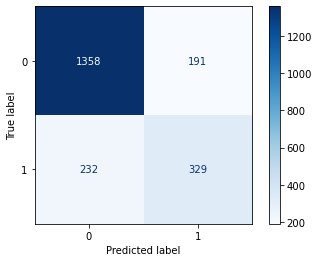

In [22]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree_model,x_test,y_test,cmap=plt.cm.Blues);

In [23]:
from sklearn.metrics import classification_report

y_pred=tree_model.predict(x_test)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

           0   0.854088  0.876695  0.865244      1549
           1   0.632692  0.586453  0.608696       561

    accuracy                       0.799526      2110
   macro avg   0.743390  0.731574  0.736970      2110
weighted avg   0.795224  0.799526  0.797034      2110



In [24]:
from sklearn.metrics import roc_curve
y_scores = tree_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

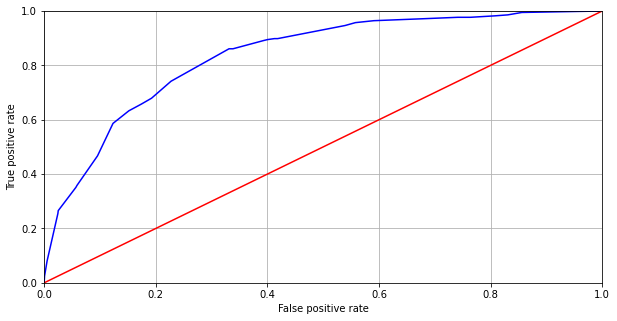

In [25]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

In [26]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8359294536524629

In [28]:
names=['Gender_Male', 'Partner_Yes', 'Dependents_Yes', 'Internet Service_Fiber optic', 'Online Backup_Yes', 'Payment Method_Electronic check', 'Tenure Months', 'Monthly Charges', 'Total Charges']

In [29]:
for var, importance in zip(names, tree_model.feature_importances_):
    if importance != 0:
        print(var, importance)

Partner_Yes 0.005999451908220507
Dependents_Yes 0.12141339846066528
Internet Service_Fiber optic 0.3039764330960789
Payment Method_Electronic check 0.032414960320910145
Tenure Months 0.3928928925019396
Monthly Charges 0.06585970560407968
Total Charges 0.07744315810810579


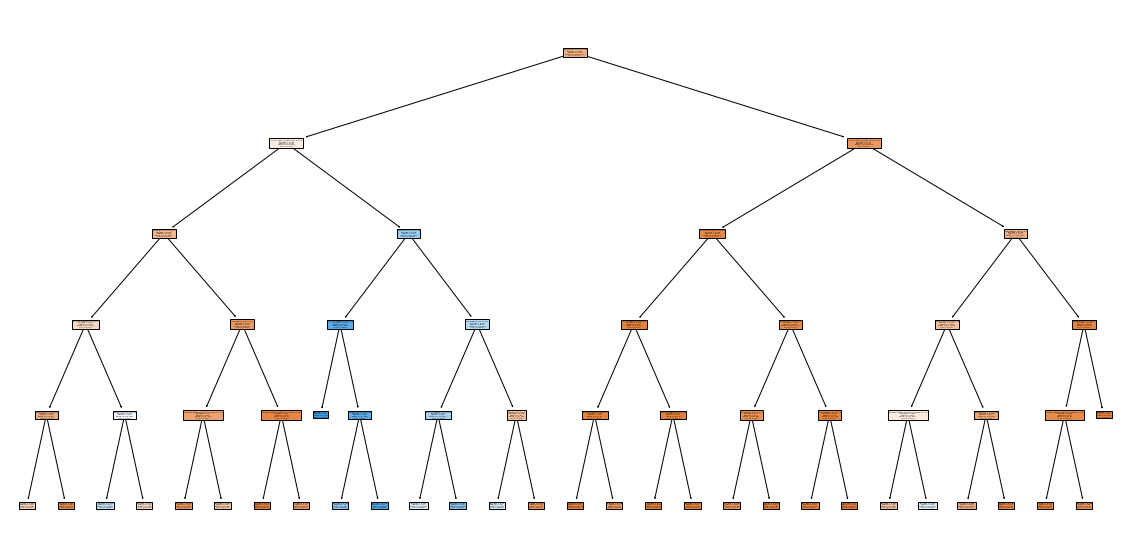

In [30]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
c=['quitter', 'rester']
plot_tree(tree_model, feature_names= names, class_names=c, filled=True)
plt.show()

In [31]:
from sklearn.tree import export_text

print(export_text(tree_model,feature_names=names))

|--- Tenure Months <= 0.22
|   |--- Internet Service_Fiber optic <= 0.50
|   |   |--- Tenure Months <= 0.06
|   |   |   |--- Monthly Charges <= 0.06
|   |   |   |   |--- Total Charges <= 0.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Total Charges >  0.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- Monthly Charges >  0.06
|   |   |   |   |--- Total Charges <= 0.01
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Total Charges >  0.01
|   |   |   |   |   |--- class: 0
|   |   |--- Tenure Months >  0.06
|   |   |   |--- Dependents_Yes <= 0.50
|   |   |   |   |--- Payment Method_Electronic check <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Payment Method_Electronic check >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Dependents_Yes >  0.50
|   |   |   |   |--- Payment Method_Electronic check <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Payment Method_Electronic check >  0.50
|   |   |   |   |   |--- class: 0
|   |--

## Aplication du modele LogisticRegression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=9)
rfe.fit(x_train, y_train)
print("Sélection de variables", rfe.support_)
print("Classement de variables", rfe.ranking_)
print("Variables sélectionnées :", list(x.columns[rfe.support_]))

Sélection de variables [False False False  True False  True False  True False False False  True
 False False False False False False False False False  True  True False
 False  True False  True False  True]
Classement de variables [17 18 13  1 12  1  9  1  6  3  2  1 15 20 16 14  4 11  7 19  5  1  1 10
 21  1 22  1  8  1]
Variables sélectionnées : ['Dependents_Yes', 'Multiple Lines_No phone service', 'Internet Service_Fiber optic', 'Online Backup_No internet service', 'Contract_One year', 'Contract_Two year', 'Payment Method_Electronic check', 'Tenure Months', 'Total Charges']


In [47]:
x_train = rfe.transform(x_train)
x_test = rfe.transform(x_test)
print(x_train.shape)
print(x_test.shape)

(4922, 9)
(2110, 9)


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


log = LogisticRegression(random_state=0)
param =  {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
          'C' : np.linspace(0,10, 100),
          'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
          'max_iter': [100,1000, 2000, 3000]}

grid = GridSearchCV(log, param_grid=param, cv =5, n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2....
        7.57575758,  7.67676768,  7.77777778,  7.87878788,  7.97979798,
        8.08080808,  8.18181818,  8.28282828,  8.38383838,  8.48484848,
        8.58585859,  8.68686869,  8.78787879,  8.88888889,  8.98989899,
        9.09090909,  9.19191919,  9.29292929,  9.39393939,  9.49494949,
        9.5959596 ,  9.6969697 ,  9.7979798 ,  9.8989899 , 10.        ]),
                         'max_iter': [100, 1000, 2000, 3000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs',

In [49]:
grid.best_params_

{'C': 1.4141414141414141,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [59]:
logre_model = LogisticRegression(random_state=0, C=1.414141, penalty = 'l2', solver='liblinear')
logre_model.fit(x_train, y_train)

print('train score : ' , logre_model.score(x_train, y_train) )
print('test score : ' , logre_model.score(x_test,y_test) )

train score :  0.8057700121901666
test score :  0.8061611374407583


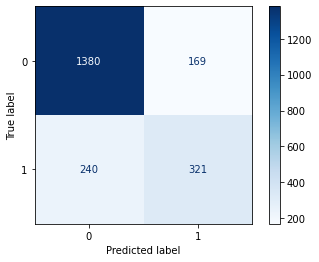

In [60]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(logre_model,x_test,y_test,cmap=plt.cm.Blues);

In [61]:
y_predi=logre_model.predict(x_test)

print(classification_report(y_test,y_predi,digits=5))

              precision    recall  f1-score   support

           0    0.85185   0.89090   0.87094      1549
           1    0.65510   0.57219   0.61085       561

    accuracy                        0.80616      2110
   macro avg    0.75348   0.73154   0.74089      2110
weighted avg    0.79954   0.80616   0.80179      2110



In [62]:
from sklearn.metrics import roc_curve
y_scores = logre_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

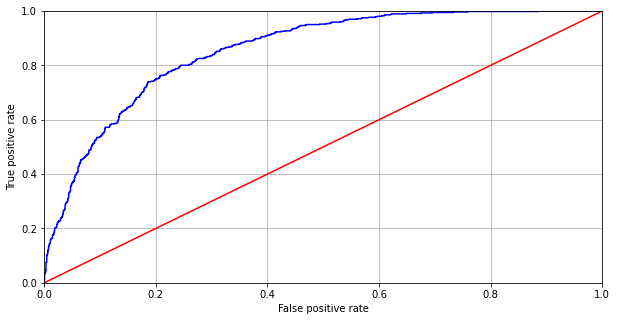

In [63]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

In [64]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8548307285822951

## Aplication du modele RandomForestClassifier

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=9)
rfe.fit(x_train, y_train)
print("Sélection de variables", rfe.support_)
print("Classement de variables", rfe.ranking_)
print("Variables sélectionnées :", list(x.columns[rfe.support_]))

Sélection de variables [ True False False  True False False False  True False False False False
 False False False False False False False False False  True  True False
 False  True False  True  True  True]
Classement de variables [ 1  6  3  1 16 21  8  1 18 20  5 11  7 15  9 22  4 17 12 19 10  1  1  2
 14  1 13  1  1  1]
Variables sélectionnées : ['Gender_Male', 'Dependents_Yes', 'Internet Service_Fiber optic', 'Contract_One year', 'Contract_Two year', 'Payment Method_Electronic check', 'Tenure Months', 'Monthly Charges', 'Total Charges']


In [79]:
x_train = rfe.transform(x_train)
x_test = rfe.transform(x_test)
print(x_train.shape)
print(x_test.shape)

(4922, 9)
(2110, 9)


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param={'criterion': ['gini','entropy'],    
      'max_depth' :np.arange(1,10),
      } 

random_grid= GridSearchCV(RandomForestClassifier(),param_grid=param,cv=5)
random_grid.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [81]:
random_grid.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [88]:
random_model=RandomForestClassifier(criterion='gini', max_depth=7,random_state=98)
random_model.fit(x_train,y_train)

print('train score : ' ,random_model.score(x_train,y_train))
print('test score : ' ,random_model.score(x_test,y_test))


train score :  0.8234457537586347
test score :  0.8066350710900474


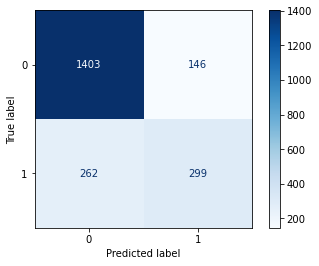

In [89]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(random_model,x_test,y_test,cmap=plt.cm.Blues);

In [90]:
y_predi=random_model.predict(x_test)

print(classification_report(y_test,y_predi,digits=5))

              precision    recall  f1-score   support

           0    0.84264   0.90575   0.87306      1549
           1    0.67191   0.53298   0.59443       561

    accuracy                        0.80664      2110
   macro avg    0.75728   0.71936   0.73374      2110
weighted avg    0.79725   0.80664   0.79898      2110



In [91]:
from sklearn.metrics import roc_curve
y_scores = random_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

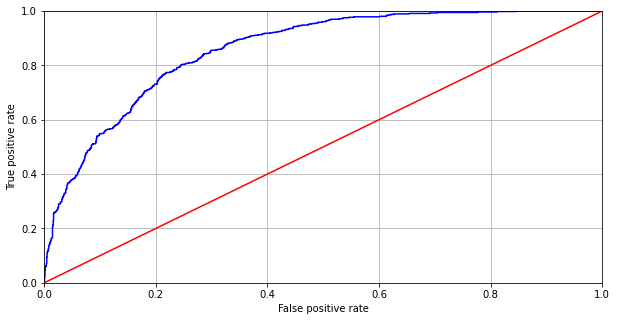

In [92]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

In [93]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.85758910642137

## Summary table 
## Selection Feature :` Recursive Feature Elimination (RFE)` (with 9 features)

In [94]:
# Regardons la construction d'une DataFrame
import numpy as np
import pandas as pd

l=['DecisionTreeClassifier','LogisticRegression','RandomForestClassifier']
train_score = pd.Series([0.8051,0.8057,0.8234], index=l)
test_score = pd.Series([0.7995,0.8061,0.8066], index=l)
f1_score_rester = pd.Series([0.8652,0.8709,0.8730], index=l)

f1_score_quitter = pd.Series([0.6086,0.6108,0.5944], index=l)
accuary = pd.Series([0.7995,0.8061,0.8066], index=l)
auc = pd.Series([0.8359,0.8548,0.8575], index=l)



In [95]:
stat = pd.DataFrame({'train_score': train_score,
                    'test_score ' : test_score,
                    'f1_score_rester': f1_score_rester,
                    'f1_score_quitter': f1_score_quitter ,
                   'accuary': accuary,
                   'AUC': auc})
stat


,train_score,test_score,f1_score_rester,f1_score_quitter,accuary,AUC
DecisionTreeClassifier,0.8051,0.7995,0.8652,0.6086,0.7995,0.8359
LogisticRegression,0.8057,0.8061,0.8709,0.6108,0.8061,0.8548
RandomForestClassifier,0.8234,0.8066,0.8730,0.5944,0.8066,0.8575


## Selection Feature :` Recursive Feature Elimination (RFE)` (with 9 features)